## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_mouse_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_df[combined_mouse_df.duplicated(["Mouse ID"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_df = combined_mouse_df.drop_duplicates(subset="Mouse ID", keep="last")
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [7]:
# Checking the number of mice in the clean DataFrame.
#combined_mouse_df[combined_mouse_df.drop_duplicates(["Mouse ID"])]
combined_mouse_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [9]:
#Summary statistics table of mean, median,variance,standard,deviation, and SEM
tumorstats = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats
tumorstats["Mean"] = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumorstats["Median"] = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
tumorstats["Standard Deviation"] = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumorstats["Variance"] = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumorstats["SEM"] = pd.DataFrame(combined_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Columns
tumorstats = tumorstats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


tumorstats.reset_index()
tumorstats.head()

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,25,36.667568,38.125164,5.715188,32.663378,1.143038
Ceftamin,25,57.753977,59.851956,8.365568,69.982735,1.673114
Infubinol,25,58.178246,60.165180,8.602957,74.010875,1.720591
Ketapril,25,62.806191,64.487812,9.945920,98.921330,1.989184
Naftisol,25,61.205757,63.283288,10.297083,106.029927,2.059417


In [10]:
#Summary statistics table of mean, median,variance,standard,deviation, and SEM
#merged_grouped_df = combined_mouse_df.groupby(["Drug Regimen"])
#tumor_mean = combined_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#tumor_mean = combined_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#tumor_mean = combined_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#tumor_mean = combined_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#tumor_mean = combined_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


#Convert to DataFrame
#tumor_df = pd.DataFrame(tumor_mean)


# DataFrame
#tumor_summary_df=tumor_df.copy()
#tumor_summary_df
#tumor_summary.reset_index()

In [11]:
#merged_grouped_df = combined_mouse_df.groupby(["Drug Regimen"])

#tumor_mean  = merged_grouped_df["Tumor Volume (mm3)"].mean()

#Convert to DataFrame
#tumor_df = pd.DataFrame(tumor_mean)


# DataFrame
#tumor_summary_df=tumor_df.copy()
#tumor_summary_df
#tumorstats.reset_index()


In [12]:
#len(tumorstats)

## Bar and Pie Charts

<IPython.core.display.Javascript object>


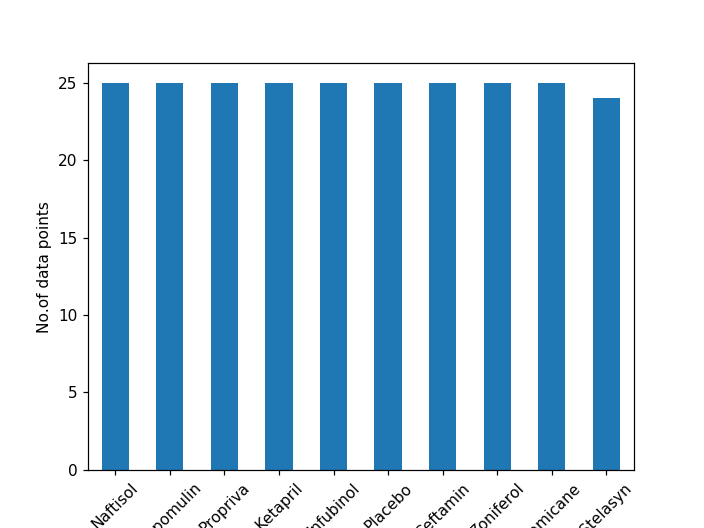

In [21]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
#mice_points['Count'] = combined_mouse_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].values
#mice_points
#mice_points.plot.bar('Drug Regimen','Count',alpha = 0.5)
#plt.show()

mice_counts =combined_mouse_df["Drug Regimen"].value_counts()
#x_axis = clean_df["Drug Regimen"].value_counts()
mice_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("No.of data points")
plt.show()

<IPython.core.display.Javascript object>


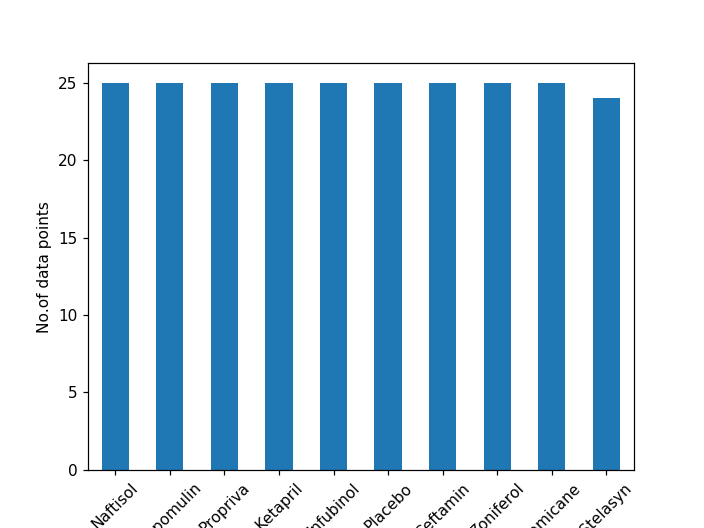

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_counts =combined_mouse_df["Drug Regimen"].value_counts()
mice_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("No.of data points")
plt.show()

#pandas_plot = mice_counts.plot(kind="bar", figsize=(8,5))
#plt.show()

<IPython.core.display.Javascript object>


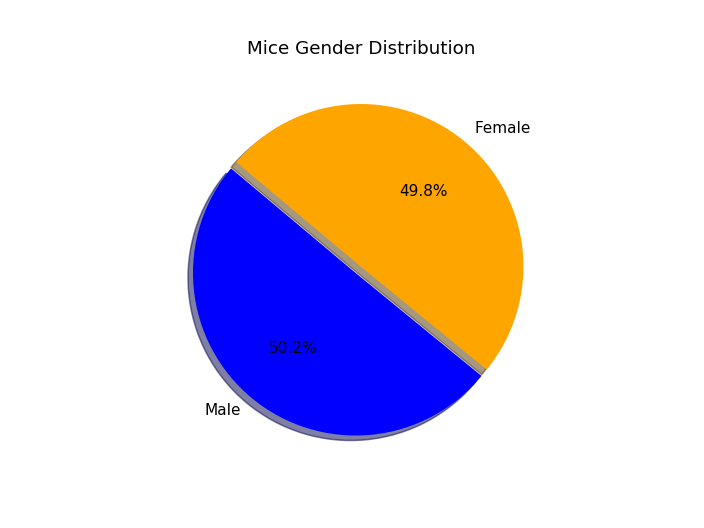

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Plotting Data
labels = 'Male', 'Female'
sex_count = combined_mouse_df["Sex"].value_counts()
colors = ['blue', 'orange']
explode = (0.05, 0)  # explode 1st slice

# Plot the pie chart
piplot =sex_count.plot(kind="pie",explode=explode, labels=labels, 
                       colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
piplot.set_xlabel("")
piplot.set_ylabel("")
piplot.set_title("Mice Gender Distribution")
plt.show()

<IPython.core.display.Javascript object>


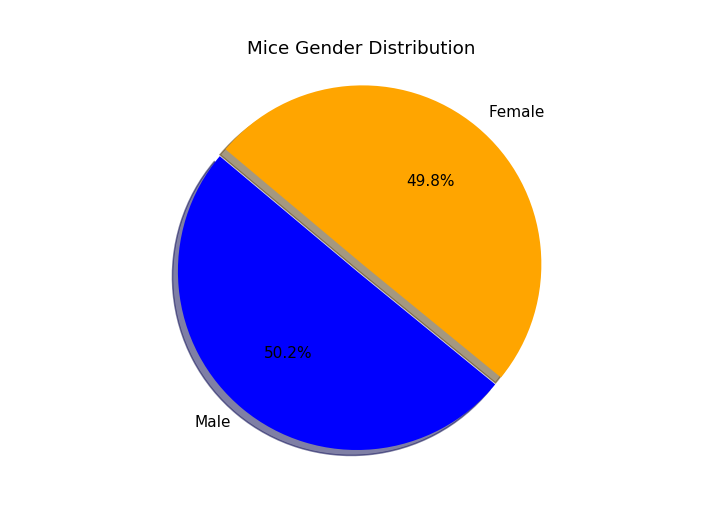

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Plotting Data
labels = 'Male', 'Female'
sex_count = combined_mouse_df["Sex"].value_counts()
colors = ['blue', 'orange']
#explode = (0.05, 0) 

# Plot pie chart
plt.title("Mice Gender Distribution")
plt.pie(sex_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
